In [1]:
import os.path
import sys
import numpy as np
import pandas as pd

import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique

# load TPRDB library
sys.path.append('/data/critt/tprdb/bin/')
import importlib
import TPRDB
importlib.reload(TPRDB)

<module 'TPRDB' from '/data/critt/tprdb/bin/TPRDB.py'>

In [2]:
# read test data from copied study 
path = "/data/critt/tprdb/PRINCESS/MusicTraProject/"
KDdf = TPRDB.readTPRDBtables(["Tables/"], "*sg", path=path, verbose = 1)

print(KDdf.shape)

Tables/	#sessions:62	*sg:168
(168, 56)


In [22]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# see first n entries
KDdf[KDdf.Task == 'TM'].head(5)

,Id,Study,Session,SL,TL,Task,Text,Part,STseg,TTseg,Nedit,Dur,FDur,PreGap,TG300,TD300,TB300,TG500,TD500,TB500,TG1000,TD1000,TB1000,TG2000,TD2000,TB2000,TG5000,TD5000,TB5000,Scatter,FixS,TrtS,FixT,TrtT,ParFixS,ParTrtS,ParFixT,ParTrtT,Ins,Del,TokS,LenS,TokT,LenT,LenMT,Yawat,String,TGnbrMean,SGnbrMean,CrossSMean,ISseg,ITseg,ICseg,ISTCseg,HTot,HTotN,nDur
0,1,MusicTraProject,P07_TM2,en,ar,TM,2,P07,1,1,1,83688,83688,6938,68966,7784,49,63355,13395,35,52951,23799,19,40982,35768,9,23406,53344,3,0.05,81,21069,33,8987,0,0,0,0,84,1,22,123,17,83,0,---,انا_اتذكر_فراشة_مكانيكية_هائلة_التي_احضرها_لي_...,1.00,1.45,1.14,0.60,2.15,0.72,2.34,6.66,0.79,3804.000000
1,2,MusicTraProject,P07_TM2,en,ar,TM,2,P07,2,2,1,233328,233328,484,212076,20768,162,192282,40562,113,148579,84265,50,124797,108047,33,41094,191750,6,0.02,195,91204,46,42168,0,0,0,0,251,1,52,278,44,249,0,---,كنت_انظر_على_الدمية_من_سريري_واحيانا_كنت_مندهش...,1.10,1.38,2.48,1.01,2.93,1.84,3.22,7.85,0.81,4487.076923
27,1,MusicTraProject,P11_TM2,en,ar,TM,2,P11,1,1,6,125547,125547,37236,74280,14031,47,67622,20689,30,52170,36141,9,47233,41078,5,39015,49296,2,0.57,74,18535,118,81004,0,0,0,0,109,21,22,123,17,88,0,---,أذكر_وأنا_أتعافي_من_مرضي_تلك_اللعبة_على_شكل_فر...,0.86,1.41,2.32,0.95,2.18,1.45,2.71,6.66,0.79,5706.681818
28,2,MusicTraProject,P11_TM2,en,ar,TM,2,P11,2,2,6,412031,412031,1063,364966,46002,163,342313,68655,104,304889,106079,53,279436,131532,35,226031,184937,20,1.61,311,94775,195,183665,0,0,0,0,327,89,52,278,41,233,0,---,أنظر_إليها_وأنا_على_سريري_في_حالة_ذهول_وخوف_بن...,1.08,1.27,1.62,1.43,2.69,2.00,3.14,7.85,0.81,7923.673077
29,1,MusicTraProject,P16_TM3,en,ar,TM,3,P16,1,1,1,82875,82875,7313,68719,6843,43,65609,9953,36,53967,21595,20,43530,32032,12,10422,65140,2,0.07,90,22599,20,15251,0,0,0,0,80,3,23,92,16,77,0,---,لا_أعلم_لماذا_كان_الصوت_الصادر_من_الفئران_في_م...,1.17,1.96,1.57,0.48,1.37,1.03,1.92,6.28,0.74,3603.260870


In [26]:
KDdf[KDdf.TokS != 0].shape
for n in modes:
    print(n, KDnn[KDnn.Task == n]['nDur'].mean())


TM 5204.758096327515
TS 5184.456635457805
TA 4815.401754201381
TL 4935.021411791795


<Axes: >

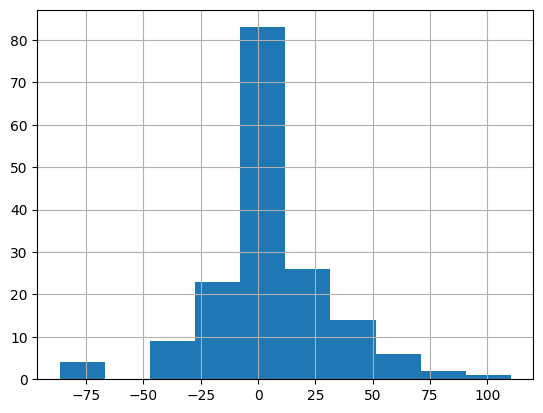

In [34]:
X = KDdf.LenS - (KDdf.LenT + 20*KDdf.LenT/100)
X.hist()

In [28]:
KDdf[KDdf.Dur > 30000].shape

(145, 57)

In [24]:
from scipy import stats

KDdf['nDur'] = KDdf['Dur'] / KDdf['TokS']
KDnn = KDdf[KDdf.TokS != 0]

modes = set(KDnn.Task)
for m in modes:
    Dur_m1 = KDnn[KDnn.Task == m]['nDur']
    for n in modes:
        Dur_m2 = KDnn[KDnn.Task == n]['nDur']
        s, p = stats.ks_2samp(Dur_m1, Dur_m2)

        print(m, n, s, p)


TM TM 0.0 1.0
TM TS 0.2785714285714286 0.06470499693070929
TM TA 0.2987179487179487 0.03854102185296597
TM TL 0.2131578947368421 0.2891514060994844
TS TM 0.2785714285714286 0.06470499693070929
TS TS 0.0 1.0
TS TA 0.12454212454212454 0.8610013489591305
TS TL 0.16917293233082706 0.5420669386162036
TA TM 0.2987179487179487 0.03854102185296597
TA TS 0.12454212454212454 0.8610013489591305
TA TA 0.0 1.0
TA TL 0.1592442645074224 0.6477622899017431
TL TM 0.2131578947368421 0.2891514060994844
TL TS 0.16917293233082706 0.5420669386162036
TL TA 0.1592442645074224 0.6477622899017431
TL TL 0.0 1.0


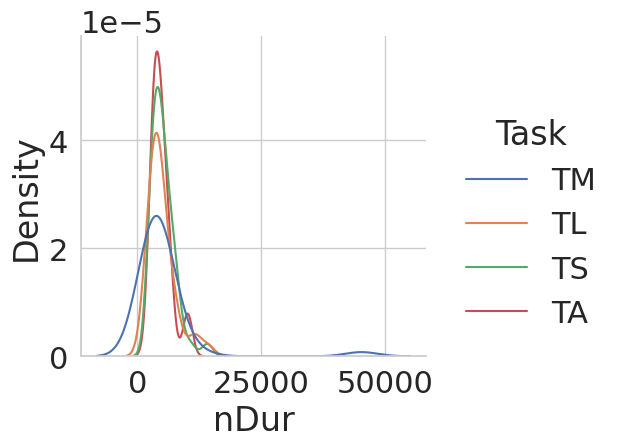

In [28]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
KDdf['min'] = KDdf['Dur'] / 60000
KDdf['nDur'] = KDdf['Dur'] / KDdf['TokS']

g = sns.displot(KDdf, x='nDur', kind='kde', hue='Task')
#g = sns.displot(KDdf, x='Dur',  hue='Task',  aspect = 1)


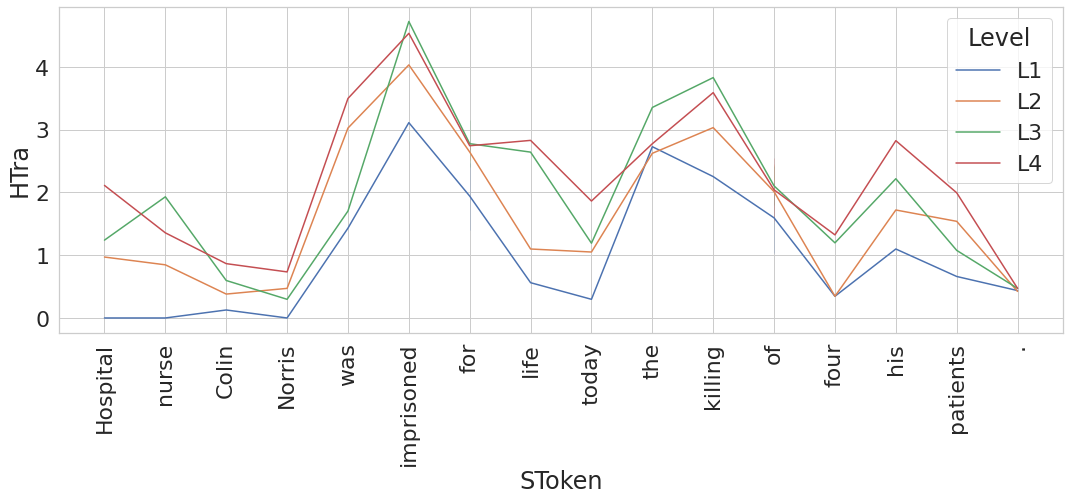

In [52]:
KD1 = KDdf[(KDdf.Part == "P01") & (KDdf.Sentence == "S1")] 

sns.set(font_scale=2)
sns.set_style("whitegrid")

plt.figure(figsize=(18, 6))  # width=12 inches, height=6 inches
plt.xticks(rotation=90)

g= sns.lineplot(data=KD1, x="SToken", y="HTra", hue="Level")

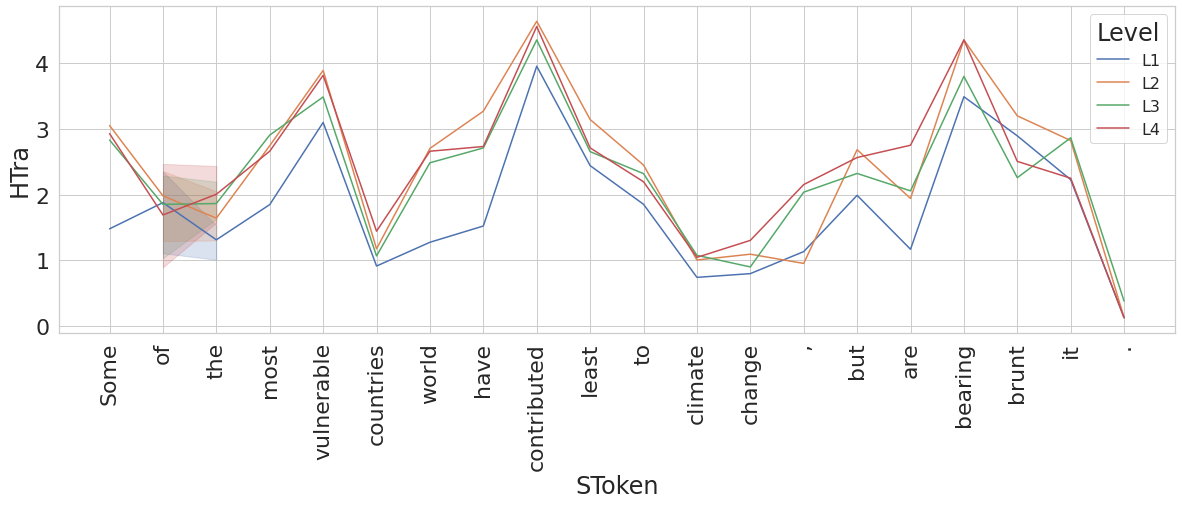

In [62]:
KD1 = KDdf[(KDdf.Part == "P01") & (KDdf.Sentence == "S2")] 

sns.set(font_scale=2)
sns.set_style("whitegrid")

plt.figure(figsize=(20, 6))  # width=12 inches, height=6 inches
plt.xticks(rotation=90)

g= sns.lineplot(data=KD1, x="SToken", y="HTra", hue="Level")
sns.move_legend(g, "upper right", fontsize=16, bbox_to_anchor=(1, 1))
